导入相关包

In [71]:
import cv2
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np

%matplotlib inline


### 探索数据集

查看视频文件

shape:


(720, 1280, 3)

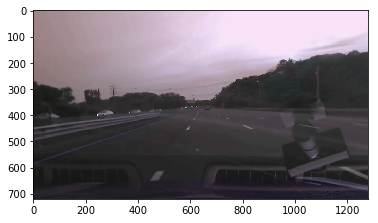

In [72]:
cap = cv2.VideoCapture("./deep_tesla/epochs/epoch01_front.mkv")
ret, frame = cap.read()
cap.release()
plt.imshow(frame)
#shape
print('shape:')
frame.shape

查看转向数据文件

In [73]:
wheel_sig = pd.read_csv('./deep_tesla/epochs/epoch01_steering.csv')
wheel_sig.head(10)

,ts_micro,frame,wheel
0,1464650070285914,0,-1.0
1,1464650070319247,1,-1.0
2,1464650070352581,2,-1.0
3,1464650070385914,3,-1.0
4,1464650070419247,4,-1.0
5,1464650070452581,5,-1.0
6,1464650070485914,6,-1.0
7,1464650070519247,7,-1.0
8,1464650070552581,8,-1.0
9,1464650070585914,9,-1.5


查看合并数据集

Records in epoch01_steering.csv : 1500
Records in epoch02_steering.csv : 3900
Records in epoch03_steering.csv : 2700
Records in epoch04_steering.csv : 2700
Records in epoch05_steering.csv : 2700
Records in epoch06_steering.csv : 2700
Records in epoch07_steering.csv : 2700
Records in epoch08_steering.csv : 2700
Records in epoch09_steering.csv : 2700
Records in epoch10_steering.csv : 2700
Total records from epoch01 to epoch10 : 27000
Distribution


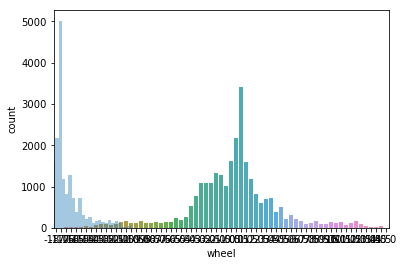

In [74]:
def get_combine_dataset(start_idx,end_idx):    
    epochs = []
    
    for i in range(start_idx,end_idx+1):
        epoch = pd.read_csv('./deep_tesla/epochs/epoch'+(str(i).zfill(2))+'_steering.csv')
        print('Records in epoch'+(str(i).zfill(2))+'_steering.csv : '+str(len(epoch)))
        epochs.append(epoch)

    return pd.concat(epochs)

def check_dataset(start_idx,end_idx):
    epoch_all = get_combine_dataset(start_idx,end_idx)
    print('Total records from epoch'+(str(start_idx).zfill(2))+' to epoch'+(str(end_idx).zfill(2))+' : '+str(len(epoch_all)))
    ax = sns.countplot(x="wheel", data=epoch_all)
    sns.distplot(epoch_all['wheel'], kde=False)
    print('Distribution')
    plt.show()
    
check_dataset(1,10)


读取图片

Records in epoch01_steering.csv : 1500
Wheel of frame 1173 : 4.5


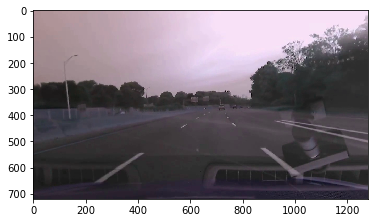

In [79]:
def show_img(img):
    plt.imshow(img)
    plt.show()
    
# load
sample_img = cv2.imread('./deep_tesla/images/img/frame_1173.jpg',cv2.IMREAD_COLOR)
epoch1 = get_combine_dataset(1,1)
sample_sig = epoch1.wheel[1173]
print('Wheel of frame 1173 : '+str(sample_sig))
#show
show_img(sample_img)

改变色域

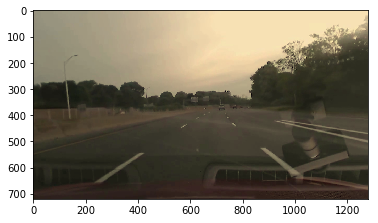

In [152]:
def change_color_space(img):
    img = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
    img = cv2.cvtColor(img, cv2.COLOR_HSV2RGB)
    img[:, :, 2] = img[:, :, 2] *np.random.uniform(0.1,1)
    return img

sample_img=cv2.imread('./deep_tesla/images/img/frame_1173.jpg',cv2.IMREAD_COLOR)
sample_img=change_color_space(sample_img)
show_img(sample_img)

平移图像

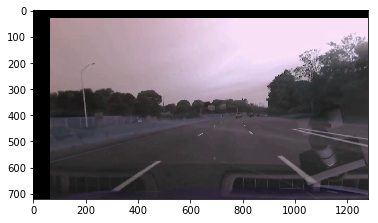

In [163]:
def translate(img):
    offset_x = np.random.uniform(1,img.shape[1]/10)
    offset_y = np.random.uniform(1,img.shape[0]/10)
    offset = np.float32([[1, 0, offset_x], [0, 1, offset_y]])
    img = cv2.warpAffine(img, offset, (img.shape[1], img.shape[0]))
    return img

sample_img=cv2.imread('./deep_tesla/images/img/frame_1173.jpg',cv2.IMREAD_COLOR)
sample_img=translate(sample_img)
show_img(sample_img)

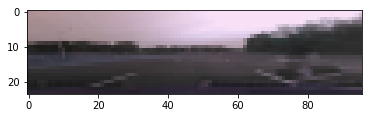

In [179]:
def resize(img):
    d_x = np.random.randint(1,200)
    d_y = np.random.randint(1,200)
    img = cv2.resize(src=img,dsize=(d_x,d_y),interpolation=cv2.INTER_AREA)

    return img

sample_img=cv2.imread('./deep_tesla/images/img/frame_1173.jpg',cv2.IMREAD_COLOR)
sample_img=resize(sample_img)
show_img(sample_img)